In [6]:
!pip install -e ..

Obtaining file:///Users/tobiasolbruck/University/PDS/PDS_Project
  Attempting uninstall: PDS-Project
    Found existing installation: PDS-Project 0.0.1.dev14
    Uninstalling PDS-Project-0.0.1.dev14:
      Successfully uninstalled PDS-Project-0.0.1.dev14
  Running setup.py develop for PDS-Project


In [7]:
import nextbike

In [8]:
df = nextbike.io.read_file()
df = nextbike.io.preprocessData(df)
pNumberNameDict = nextbike.io.createStationNameDictionary(df)
df_trips = nextbike.io.createTrips(df)

Error at lines:
128324
128580
128674
128824
128860
129114
129340
129513
130326
648905
649161
649255
649405
649441
649695
649921
650094
650907
1169486
1169742
1169836
1169986
1170022
1170276
1170502
1170675
1171488


In [9]:
df_trips.head()

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,True,15,5173,5159
1,11169,2019-01-20 08:15:00,2019-01-20 11:39:00,03:24:00,8.770358,50.804522,8.770358,50.804522,True,15,5159,5159
2,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,True,15,5159,5178
3,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,True,15,5178,5150
4,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,True,15,5150,5150


In [29]:
df_trips["bNumber"].unique()

array([11169, 11270, 11115, 11286, 11235, 11214, 11154, 11113, 11103,
       11195, 11231, 11289, 11138, 11207, 11101, 11285, 11127, 11114,
       11212, 11130, 11126, 11185, 11230, 11218, 11271, 11276, 11180,
       11150, 11278, 11141, 11144, 11105, 11287, 11253, 11190, 11298,
       11220, 11261, 11157, 11178, 11132, 11275, 11198, 11179, 11124,
       11112, 11109, 11164, 11243, 11249, 11143, 11181, 11137, 11133,
       11176, 11295, 11182, 11119, 11291, 11206, 11175, 11166, 11125,
       11136, 11237, 11142, 11293, 11118, 11268, 11170, 11104, 11192,
       11215, 11246, 11202, 11267, 11277, 11116, 11296, 11149, 11194,
       11255, 11199, 11163, 11111, 11209, 11117, 11200, 11233, 11250,
       11240, 11265, 11239, 11152, 11171, 11266, 11159, 11257, 11107,
       11108, 11197, 11242, 11251, 11128, 11102, 11297, 11281, 11238,
       11155, 11288, 11247, 11160, 11189, 11203, 11241, 11168, 11282,
       11254, 11193, 11222, 11213, 11284, 11204, 11146, 11229, 11147,
       11263, 11227,

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Vergleiche die Anzahl an Fahrten in der Woche und am Wochenende
df_weekend_count = pd.DataFrame(data=pd.Index(df_trips['weekend']).value_counts())
df_weekend_count.rename(columns={"weekend": "Number of Trips"}, inplace=True)
df_weekend_count.insert(0, "Type of Day", ["Weekday", "Weekend"], True)
df_weekend_count.insert(2, "Number of Trips per Day", pd.DataFrame(data=df_weekend_count["Number of Trips"]).div([[5,2]])["Number of Trips"], True)
df_weekend_count.set_index('Type of Day', inplace=True)
df_weekend_count

,Number of Trips,Number of Trips per Day
Type of Day,,
Weekday,488169,97633.8
Weekend,142749,71374.5


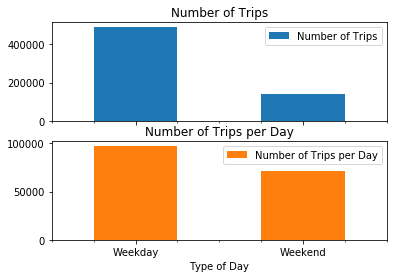

In [12]:
axes = df_weekend_count.plot.bar(rot=0, subplots=True)

In [13]:
# Calculate trip length in seconds
df_trips["durationInSec"] = df_trips["duration"].dt.total_seconds().astype(int)

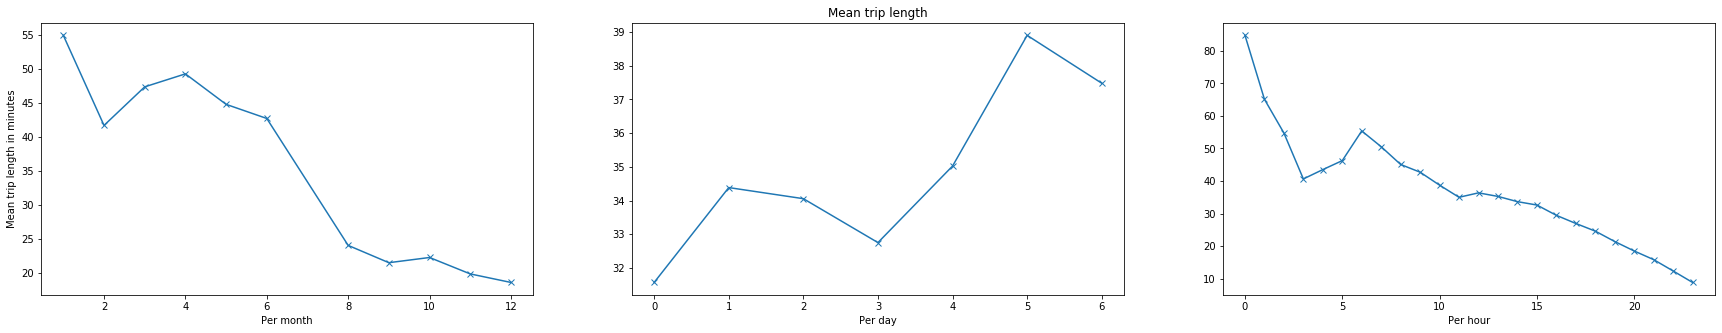

In [14]:
# Calculate and plot mean trip length
meanTripLengthPerMonth = df_trips.groupby(df_trips.sTime.dt.month).durationInSec.mean(numeric_only=False)
meanTripLengthPerDay = df_trips.groupby(df_trips.sTime.dt.dayofweek).durationInSec.mean(numeric_only=False)
meanTripLengthPerHour = df_trips.groupby(df_trips.sTime.dt.hour).durationInSec.mean(numeric_only=False)
# plot figures
plt.rcParams["figure.figsize"][0] = 30
plt.rcParams["figure.figsize"][1] = 5
plt.subplot(1, 3, 1)
plt.plot(meanTripLengthPerMonth.index, meanTripLengthPerMonth/60, 'x-')
plt.xlabel("Per month")
plt.ylabel('Mean trip length in minutes')

plt.subplot(1, 3, 2)
plt.plot(meanTripLengthPerDay.index, meanTripLengthPerDay/60, 'x-')
plt.title("Mean trip length")
plt.xlabel("Per day")

plt.subplot(1, 3, 3)
plt.plot(meanTripLengthPerHour.index, meanTripLengthPerHour/60, 'x-')
plt.xlabel("Per hour")

plt.show()

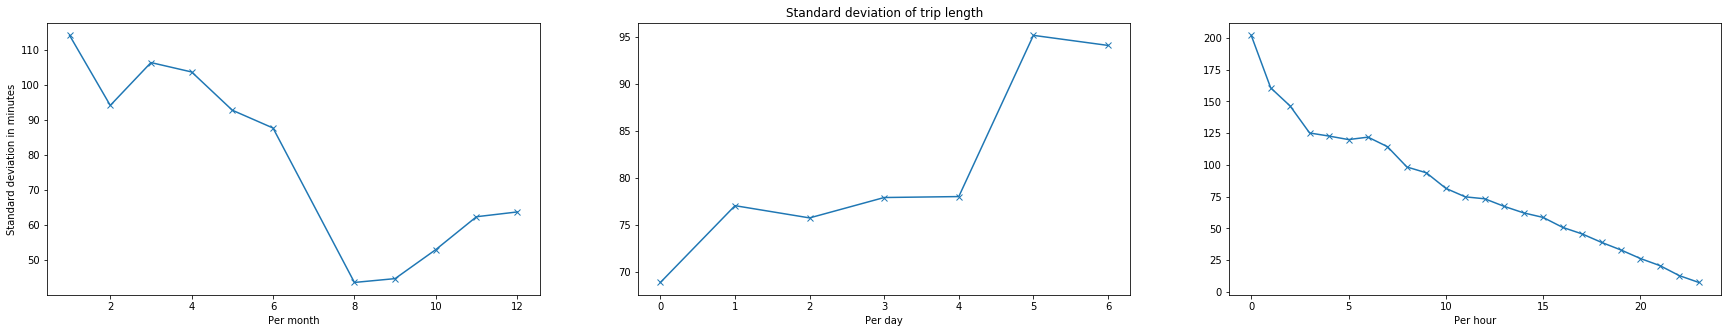

In [15]:
# Calculate and plot standard deviation of trip length
stdTripLengthPerMonth = df_trips.groupby(df_trips.sTime.dt.month).durationInSec.std()
stdTripLengthPerDay = df_trips.groupby(df_trips.sTime.dt.dayofweek).durationInSec.std()
stdTripLengthPerHour = df_trips.groupby(df_trips.sTime.dt.hour).durationInSec.std()
# plot figures
plt.rcParams["figure.figsize"][0] = 30
plt.rcParams["figure.figsize"][1] = 5

plt.subplot(1, 3, 1)
plt.plot(stdTripLengthPerMonth.index, stdTripLengthPerMonth/60, 'x-')
plt.xlabel("Per month")
plt.ylabel('Standard deviation in minutes')

plt.subplot(1, 3, 2)
plt.plot(stdTripLengthPerDay.index, stdTripLengthPerDay/60, 'x-')
plt.title("Standard deviation of trip length")
plt.xlabel("Per day")

plt.subplot(1, 3, 3)
plt.plot(stdTripLengthPerHour.index, stdTripLengthPerHour/60, 'x-')
plt.xlabel("Per hour")

plt.show()

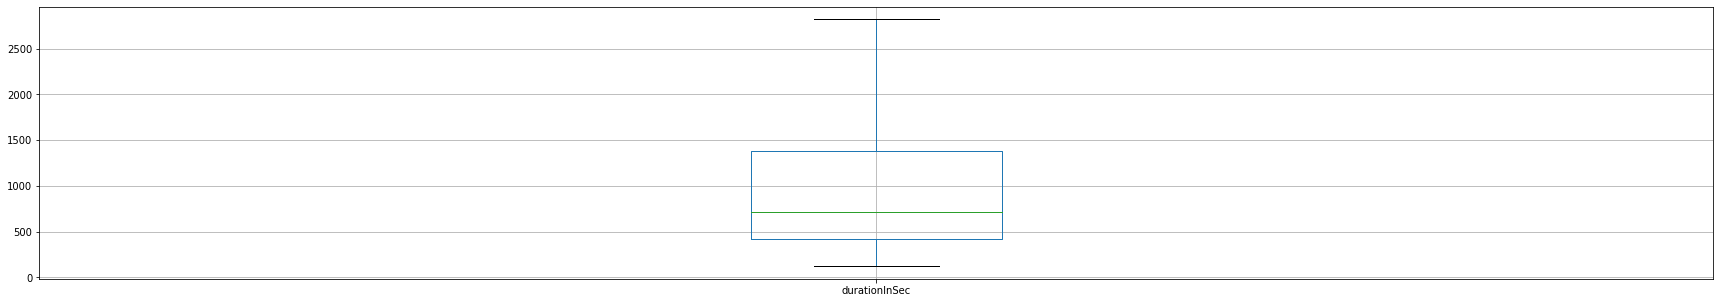

In [21]:
# Box plot for trip duration in general
df_trips.boxplot("durationInSec", showfliers=False)

In [17]:
df_trips['month'] = pd.DatetimeIndex(df_trips["sTime"]).month
df_trips['day'] = pd.DatetimeIndex(df_trips["sTime"]).day
df_trips['hour'] = pd.DatetimeIndex(df_trips["sTime"]).hour

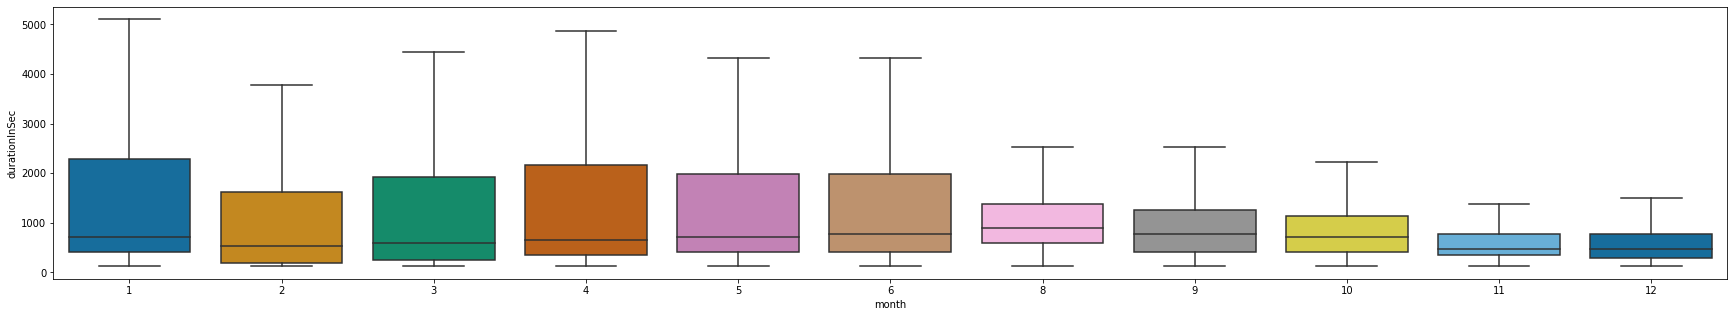

In [22]:
# Boxplots per Month
sns.boxplot(y='durationInSec', x='month', data=df_trips, palette="colorblind", showfliers=False)

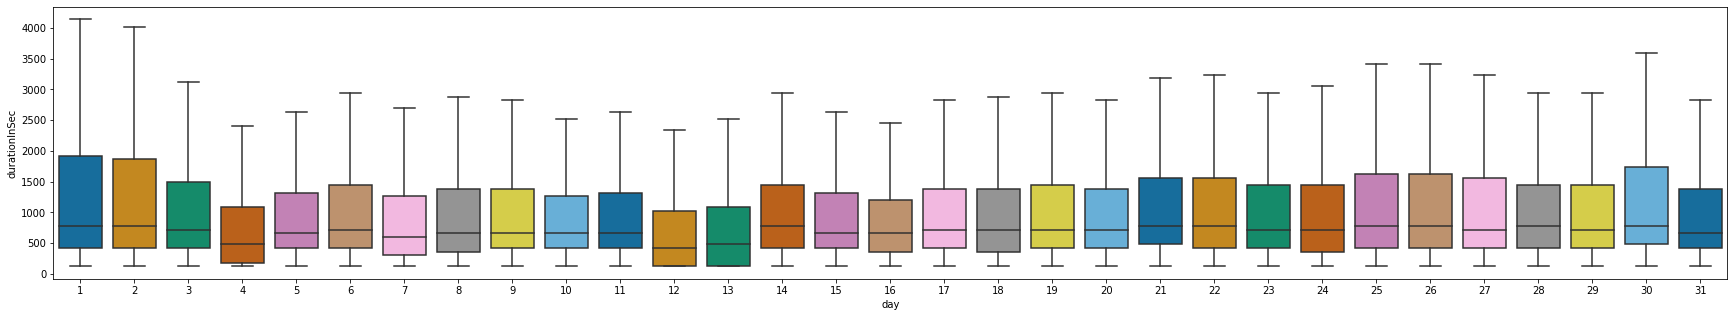

In [23]:
# Boxplots per Day
sns.boxplot(y='durationInSec', x='day', data=df_trips, palette="colorblind", showfliers=False)

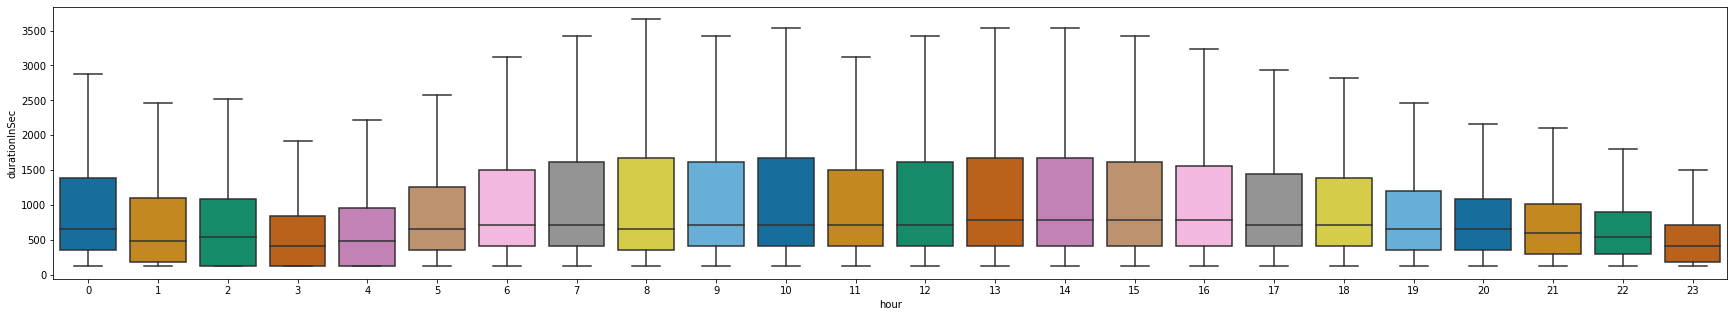

In [24]:
# Boxplots per Hour
sns.boxplot(y='durationInSec', x='hour', data=df_trips, palette="colorblind", showfliers=False)